In [2]:
import scipy as sp
import scipy.linalg as la
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline
sp.set_printoptions(precision=3, linewidth=300)

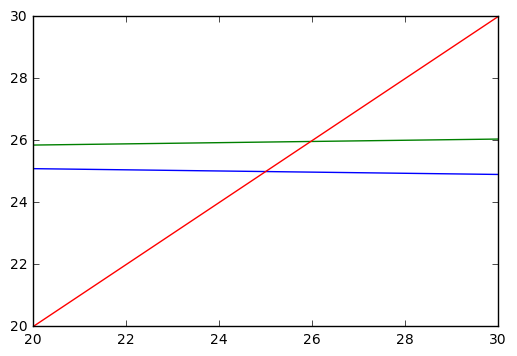

In [3]:
Id = 7.06
Ip = 13.69
k = 2.97*10e5
c = 0
omega = sp.linspace(20, 30, 1000)
Id0 = sp.array([[Id, 0],
                [0, Id]])
K = sp.array([[k, 0],
              [0, k]])
C = sp.array([[c, 0],
              [0, c]])
G = sp.array([[0, Ip],
              [-Ip, 0]])
    
I = sp.eye(len(Id0))
Z = sp.zeros_like(Id0)
Idinv = la.inv(Id0)
    
fw = []
bw = []
for w in omega:
    A = sp.vstack([sp.hstack([         Z,            I]),
                    sp.hstack([-Idinv @ K, -Idinv @ (G*w + C)])])
    evalues, evects = la.eig(A)
    evalues = sp.sort(evalues.imag)
    wn = (sp.sqrt(evalues)).real
    bw.append(wn[2])
    fw.append(wn[3])
plt.plot(omega, bw)
plt.plot(omega, fw)
plt.plot(omega, omega)

In [4]:
# De modo a selecionar as frequenciais naturais do sistema, foi criado um loop que compara o valor da função omega
# com as funções bw e fw dentro de uma tolerencia estabelecida. Como a frequencia natural é dada pela igualdade de omega com
# fw e bw, assume-se uma tolerancia de tol para omega de modo que fw e bw se encontrem dentro dessa tolerancia.
#
# Desse modo, esses valores encontrados dentro desta tolerancia são armazenados dentro de uma lista. Partindo do principio que
# todos os valores da lista se encontram dentro da tolerancia estabelecida, pode-se dizer que a média desses valores também
# se encontra dentro da tolerancia. Se o intervalo de tolerancia for suficientemente pequeno de modo a satisfazer as condições
# estabelecidas, a média dos valores encontrados (bwn e fwn) também são válidos. Dessa forma, assumi-se que as frequenciais
# naturais são dadas por wbwn e wfwn.

fwn = []
bwn = []
c=0
d=0
tol=0.01
for w in omega:
    up = w+tol
    down = w-tol
    if c<len(omega):
        if bw[c] < up:
            if bw[c] > down:
                bwn.append(bw[c])
                c=c+1
        c=c+1
    
    
for w in omega:
    up = w+tol
    down = w-tol
    if d<len(omega):
        if fw[d] < up:
            if fw[d] > down:
                fwn.append(fw[d])
                d=d+1
        d=d+1

wbwn = sp.mean(bwn)
wfwn = sp.mean(fwn)

In [5]:
def funcbw(x, t):
    A = sp.vstack([sp.hstack([         Z,            I]),
                    sp.hstack([-Idinv @ K, -Idinv @ G*wbwn])])
    f = [0,0,0,0]
    dxdt = A @ x + f
    
    return dxdt

In [6]:
def funcfw(x, t):
    A = sp.vstack([sp.hstack([         Z,            I]),
                    sp.hstack([-Idinv @ K, -Idinv @ G*wfwn])])
    f = [0,0,0,0]
    dxdt = A @ x + f
    
    return dxdt

In [7]:
# Condições iniciais
a0=0.01
da0=0
b0=0
db0=0

#Criar array com condições iniciais
z0 = [a0, b0, da0, db0]

# Criar array com o tempo
tf = 50
t = sp.linspace(0, tf, 5000)

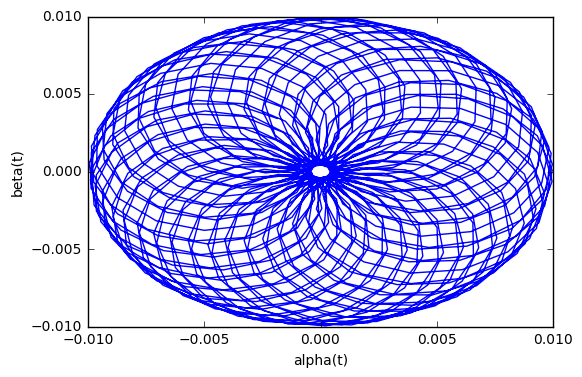

In [8]:
solbw = odeint(funcbw, z0, t,)
plt.plot(solbw[4000:,0], solbw[4000:,1])
plt.ylabel('beta(t)')
plt.xlabel('alpha(t)')
plt.show()

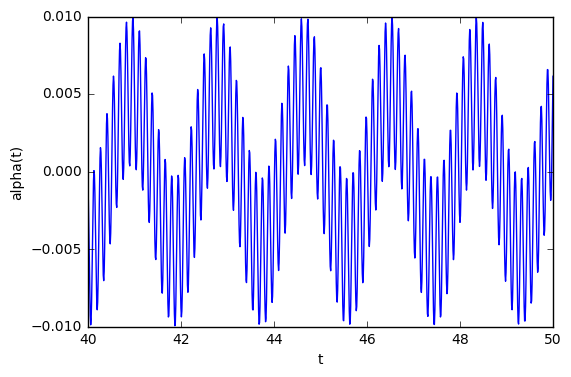

In [9]:
plt.plot(t[4000:], solbw[4000:,0])
plt.ylabel('alpha(t)')
plt.xlabel('t')
plt.show()

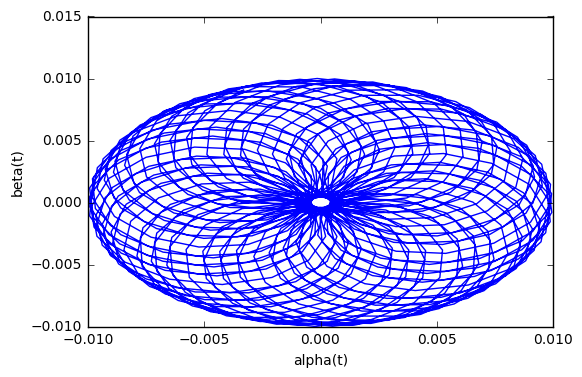

In [10]:
solfw = odeint(funcfw, z0, t,)
plt.plot(solfw[4000:,0], solfw[4000:,1])
plt.ylabel('beta(t)')
plt.xlabel('alpha(t)')
plt.show()